# CS273A Homework 1 
### Due: Friday, October 13th 2023 (11:59 PM)

---
## Instructions

Welcome to CS 273A!


This homework (and many subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it.


Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to modify these starter Jupyter notebooks to complete your assignment and to write your report. You may add additional cells (containing either code or text) as needed. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

Several problems in this assignment require you to create plots. Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `pandas` or `seaborn`. Unless you are told otherwise, you should call `pyplot` plotting functions with their default arguments.
 
If you have any questions/concerns about the homework problems or using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or Latex to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: Bayes Classifiers (by hand) (15 points)
    - Problem 1.1: Estimating probabilities (5 points)
    - Problem 1.2: Computing posterior probabilities (10 points)
- Problem 2: Exploring a NYC Housing Dataset (30 points)
    - Problem 2.1: Numpy Arrays (5 points)
    - Problem 2.2: Feature Statistics (5 points)
    - Problem 2.3: Logical Indexing (5 points)
    - Problem 2.4: Histograms (5 points)
    - Problem 2.5: Scatter Plots (10 points)
- Problem 3: K-Nearest Neighbors Classifier (35 points)
    - Problem 3.1: Computing the error rate (5 points)
    - Problem 3.2: Computing the confusion matrix (5 points)
    - Problem 3.3: Decision boundaries (10 points)
    - Problem 3.4: Error rates versus k (10 points)
    - Problem 3.5: Model selection (5 points)
- Problem 4: KNN on the MNIST dataset (15 points)
    - Problem 4.1: Confusion matrix (5 points)
    - Problem 4.2: Examining the neighbors (10 points)
- Statement of Collaboration (5 points)

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

Before we get started, let's import some libraries that you will make use of in this assignment. Make sure that you run the code cell below in order to import these libraries.

**Important: In the code block below, we set `seed=123`. This is to ensure your code has reproducible results and is important for grading. Do not change this. If you are not using the provided Jupyter notebook, make sure to also set the random seed as below.**

In [1]:
%pip install -q -U scikit-learn
%pip install -q -U matplotlib
%pip install -q -U requests
%pip install -q -U pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

import requests           # we'll use these for reading data from a url
from io import StringIO

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 123
np.random.seed(seed)  

## Problem 1: Computing Naive Bayes Predictions (by hand)

In order to reduce my email load, I decide to implement a machine learning algorithm to decide whether
or not I should read an email, or simply file it away instead.  To train my
model, I obtain the following data set of binary-valued features about each email,
including whether I know the author or not, whether the email is long or short, and
whether it has any of several key words, along
with my final decision about whether to read it ($y=+1$ for "read", $y=-1$ for "discard").

| $x_1$: know author? | $x_2$: is long? | $x_3$: has "research" | $x_4$: has "grade" | $x_5$: has "lottery" | $\Rightarrow$ $y$: read? |
| --- | --- | --- | --- | --- | --- |
| 0 | 0 | 1 | 1 | 0 | -1 |
| 1 | 1 | 0 | 1 | 0 | -1 |
| 0 | 1 | 1 | 1 | 1 | -1 |
| 1 | 1 | 1 | 1 | 0 | -1 |
| 0 | 1 | 0 | 0 | 0 | -1 |
| 1 | 0 | 1 | 1 | 1 |  1 |
| 0 | 0 | 1 | 0 | 0 |  1 |
| 1 | 0 | 0 | 0 | 0 |  1 |
| 1 | 0 | 1 | 1 | 0 |  1 |
| 1 | 1 | 1 | 1 | 1 | -1 |


I decide to try a na\"ive Bayes classifier to make my decisions and compute my uncertainty.  In the case of any ties where both classes have equal probability, we will prefer to predict class $+1$.

### Problem 1.1: (5 points) Compute Naive Bayes Probabilities

Compute all the probabilities necessary for a naive Bayes classifier on these data, i.e., the class probability $p(y)$ and all the individual feature probabilities $p(x_j | y)$ for each class $y$ and feature $x_j$:

| Description                                                                       | Probability                            |  Result  |
| :-------------------------------------------------------------------------------- | :------------------------------------- | :------: |
| Probability of reading email                                                      | $ P(y = 1) = \frac{4}{10} $            | $ 0.4 $  |
| Probability of discarding email                                                   | $ P(y = -1) = \frac{6}{10} $           | $ 0.6 $  |
| --------------------------------------------------------------------------------- | -------------------------------------- | -------- |
| Probability of known author given mail is read                                    | $ P(x_1 = 1 \| y = 1) = \frac{3}{4} $  | $ 0.75 $ |
| Probability of email is long given it is read                                     | $ P(x_2 = 1 \| y = 1) = \frac{0}{4} $  |  $ 0 $   |
| Probability of containing keyword 'research' given mail is read                   | $ P(x_3 = 1 \| y = 1) = \frac{3}{4} $  | $ 0.75 $ |
| Probability of containing keyword 'grade' given mail is read                      | $ P(x_4 = 1 \| y = 1) = \frac{2}{4} $  | $ 0.5 $  |
| Probability of containing keyword 'lottery' given mail is read                    | $ P(x_5 = 1 \| y = 1) = \frac{1}{4} $  | $ 0.25 $ |
| --------------------------------------------------------------------------------- | -------------------------------------- | -------- |
| Probability of known author given mail is __NOT__ read                            | $ P(x_1 = 1 \| y = -1) = \frac{3}{6} $ | $ 0.5 $  |
| Probability of email is long given it is __NOT__ read                             | $ P(x_2 = 1 \| y = -1) = \frac{5}{6} $ | $ 0.84 $ |
| Probability of containing keyword 'research' given mail is __NOT__ read           | $ P(x_3 = 1 \| y = -1) = \frac{4}{6} $ | $ 0.67 $ |
| Probability of containing keyword 'grade' given mail is __NOT__ read              | $ P(x_4 = 1 \| y = -1) = \frac{5}{6} $ | $ 0.84 $ |
| Probability of containing keyword 'lottery' given mail is __NOT__ read            | $ P(x_5 = 1 \| y = -1) = \frac{2}{6} $ | $ 0.34 $ |
| --------------------------------------------------------------------------------- | -------------------------------------- | -------- |
| Probability of __NOT__ known author given mail is read                            | $ P(x_1 = 0 \| y = 1) = \frac{1}{4} $  | $ 0.25 $ |
| Probability of email is __NOT__ long given it is read                             | $ P(x_2 = 0 \| y = 1) = \frac{4}{4} $  |  $ 1 $   |
| Probability of does __NOT__ contain keyword 'research' given mail is read         | $ P(x_3 = 0 \| y = 1) = \frac{1}{4} $  | $ 0.25 $ |
| Probability of does __NOT__ contain keyword 'grade' given mail is read            | $ P(x_4 = 0 \| y = 1) = \frac{2}{4} $  | $ 0.5 $  |
| Probability of does __NOT__ contain keyword 'lottery' given mail is read          | $ P(x_5 = 0 \| y = 1) = \frac{3}{4} $  | $ 0.75 $ |
| --------------------------------------------------------------------------------- | -------------------------------------- | -------- |
| Probability of __NOT__ known author given mail is __NOT__ read                    | $ P(x_1 = 0 \| y = -1) = \frac{3}{6} $ | $ 0.5 $  |
| Probability of email is __NOT__ long given it is __NOT__ read                     | $ P(x_2 = 0 \| y = -1) = \frac{1}{6} $ | $ 0.17 $ |
| Probability of does __NOT__ contain keyword 'research' given mail is __NOT__ read | $ P(x_3 = 0 \| y = -1) = \frac{2}{6} $ | $ 0.34 $ |
| Probability of does __NOT__ contain keyword 'grade' given mail is __NOT__ read    | $ P(x_4 = 0 \| y = -1) = \frac{1}{6} $ | $ 0.17 $ |
| Probability of does __NOT__ contain keyword 'lottery' given mail is __NOT__ read  | $ P(x_5 = 0 \| y = -1) = \frac{4}{6} $ | $ 0.67 $ |
| --------------------------------------------------------------------------------- | -------------------------------------- | -------- |

### Problem 1.2: (10 points) Compute posterior probabilities and predictions

(a) Compute the posterior probabilities that $y=+1$ given observation $x = (0\ 0\ 0\ 0\ 0)$.

$$
    P(y = 1 | x = (0\ 0\ 0\ 0\ 0)) = 
$$
$$
    \frac{P(y = 1) \cdot P(x_1 = 0 | y = 1) \cdot P(x_2 = 0 | y = 1) \cdot P(x_3 = 0 | y = 1) \cdot P(x_4 = 0 | y = 1) \cdot P(x_5 = 0 | y = 1)}{\left[P(y = 1) \cdot P(x_1 = 0 | y = 1) \dots P(x_5 = 0 | y = 1)\right] + \left[P(y = -1) \cdot P(x_1 = 0 | y = -1) \dots P(x_5 = 0 | y = -1)\right]}
$$
$$
    = \frac{0.4 \cdot 0.25 \cdot 1 \cdot 0.25 \cdot 0.5 \cdot 0.75}{[0.4 \cdot 0.25 \cdot 1 \cdot 0.25 \cdot 0.5 \cdot 0.75] + [0.6 \cdot 0.5 \cdot 0.17 \cdot 0.34 \cdot 0.17 \cdot 0.67]}
$$

$$
    = 0.826
$$


(b) Next compute the posterior probability that $y=+1$ given observation $x = (1\ 1\ 0\ 1\ 0)$.

$$
    P(y = 1 | x = (1\ 1\ 0\ 1\ 0)) = 
$$
$$    
    \frac{P(y = 1) \cdot P(x_1 = 1 | y = 1) \cdot P(x_2 = 1 | y = 1) \cdot P(x_3 = 0 | y = 1) \cdot P(x_4 = 1 | y = 1) \cdot P(x_5 = 0 | y = 1)}{\left[P(y = 1) \cdot P(x_1 = 1 | y = 1) \dots P(x_5 = 0 | y = 1)\right] + \left[P(y = -1) \cdot P(x_1 = 1 | y = -1) \dots P(x_5 = 0 | y = -1)\right]}
$$
$$
    = \frac{0.4 \cdot 0.75 \cdot 0 \cdot 0.25 \cdot 0.5 \cdot 0.75}{[0.4 \cdot 0.75 \cdot 0 \cdot 0.25 \cdot 0.5 \cdot 0.75] + [0.6 \cdot 0.5 \cdot 0.84 \cdot 0.34 \cdot 0.84 \cdot 0.67]}
$$

$$
    = 0
$$

(c) What prediction for $y$ would you make in each case?

In case of (a), there is high likelihood (86% probability) that the email will be read. On the other hand, in case of (b), it is very unlikely (0% probability) the email will be read.

---
## Problem 2: Exploring a NYC Housing Dataset

In this problem, you will explore some basic data manipulation and visualizations with a small dataset of real estate prices from NYC. For every datapoint, we are given several real-valued features which will be used to predict the target variable, y, representing in which borough the property is located. Let's first load in the dataset by running the code cell below:

In [3]:
# Load the features and labels from an online text file
url = 'https://ics.uci.edu/~ihler/classes/cs178/data/nyc_housing.txt'
with requests.get(url) as link:
    datafile = StringIO(link.text)
    nych = np.genfromtxt(datafile,delimiter=None)
    nych_X, nych_y = nych[:,:-1], nych[:,-1]

These data correspond to (a small subset of) property sales in New York in 2014. The target, $y$, represents the borough in which the property was located (0: Manhattan; 1: Bronx; 2: Staten Island).  The observed features correspond to the property size (square feet), price (USD), and year built; the first two features have been log2-transformed (e.g., $x_1 = \log_2(\textrm{size})$) for convenience.

In [4]:
# Constant variables for districts and labels for reference in the future
district_names = ['manhattan', 'bronx', 'staten_island']
feature_labels = ['property_size', 'price', 'year_built']

### Problem 2.1 (5 points): Numpy Arrays

The variable `nych_X` is a numpy array containing the feature vectors in our dataset, and `nych_y` is a numpy array containing the corresponding labels.

- What is the shape of `nych_X` and `nych_y`? ([Hint](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html))

In [5]:
print('Shape of nych_X: ', nych_X.shape)
print('Shape of nych_y: ', nych_y.shape)

Shape of nych_X:  (300, 3)
Shape of nych_y:  (300,)


- How many datapoints are in our dataset, and how many features does each datapoint have? 
    - Given that the shape of `nych_X` is `(300, 3)`, we can infer that it contains `300` rows and `3` columns, signifying that there are `300` datapoints and `3` feature for each datapoint.
    - Datapoints: `300`
    - Features: `3`

- How many different classes (i.e. labels)  are there? 
    - There are 3 different classes - `[0, 1, 2]`

In [6]:
np.unique(nych_y) # Get unique elements from nych_y

array([0., 1., 2.])

- Print rows 3, 4, 5, and 6 of the feature matrix and their corresponding labels. Since Python is zero-indexed, we will count our rows starting at zero -- for example, by "row 0" we mean `nych_X[0, :]`, and "row 1" means `nych_X[1, :]`, etc. (Hint: you can do this in two lines of code with slicing).

In [7]:
prob_21d_rows = list(range(3, 7)) # Rows to print
print('Feature matrix for indices (3, 4, 5, 6): \n', nych_X[prob_21d_rows, :], end='\n\n')
print('Labels for indices (3, 4, 5, 6): ', nych_y[prob_21d_rows])

Feature matrix for indices (3, 4, 5, 6): 
 [[  16.26956503   23.3778248  1922.        ]
 [  16.14859574   22.52850371 1929.        ]
 [  15.86570911   22.68645607 1936.        ]
 [  12.01367161   18.4169954  1925.        ]]

Labels for indices (3, 4, 5, 6):  [1. 1. 1. 1.]


### Problem 2.2 (5 points): Feature Statistics

Let's compute some statistics about our features. You are allowed to use `numpy` to help you with this problem -- for example, you might find some of the `numpy` functions listed [here](https://numpy.org/doc/stable/reference/routines.statistics.html) or [here](https://numpy.org/doc/stable/reference/routines.math.html) useful.

- Compute the mean, variance, and standard deviation of each feature.
- Compute the minimum and maximum value for each feature.

Make sure to print out each of these values, and indicate clearly which value corresponds to which computation.

In [8]:
# Compute mean of nych_X for each column (column-wise: axis = 0)
data_features_mean = np.mean(nych_X, axis=0)
# Compute variance of nych_X for each column (column-wise)
data_features_var = np.var(nych_X, axis=0)
# Compute standard deviation of nych_X for each column (column-wise)
data_features_std = np.std(nych_X, axis=0)
# Compute minimum of nych_X for each column (column-wise)
data_features_min = np.min(nych_X, axis=0)
# Compute maximum of nych_X for each column (column-wise)
data_features_max = np.max(nych_X, axis=0)

# Dataframe to store and view the result in table format
data_features_stats_df = pd.DataFrame(columns=[
    'Feature', 'Mean', 'Variance', 'Standard Deviation', 'Minimum', 'Maximum'
])

for label_idx, label in enumerate(feature_labels):
    data_features_stats_df.loc[label_idx] = [
        label,
        data_features_mean[label_idx],
        data_features_var[label_idx],
        data_features_std[label_idx],
        data_features_min[label_idx],
        data_features_max[label_idx]
    ]

data_features_stats_df

Feature         Mean     Variance  Standard Deviation      Minimum  \
0  property_size    14.118392     6.600225            2.569090    10.366322   
1          price    21.907116     8.871930            2.978578    16.872675   
2     year_built  1946.353333  1253.081822           35.398896  1893.000000   

       Maximum  
0    20.152714  
1    29.123861  
2  2014.000000

| Feature           |    Mean     |  Variance   | Standard Deviation |  Minimum  |  Maximum  |
| ----------------- | :---------: | :---------: | :----------------: | :-------: | :-------: |
| __Property Size__ |  14.118392  |  6.600225   |      2.569090      | 10.366322 | 20.152714 |
| __Price__         |  21.907116  |  8.871930   |      2.978578      | 16.872675 | 29.123861 |
| __Year Built__    | 1946.353333 | 1253.081822 |     35.398896      |   1893    |   2014    |

### Problem 2.3 (5 points): Logical Indexing

Use numpy's logical indexing to extract only those data corresponding to $y=0$ (Manhattan). Then, compute the mean and standard deviation of *only these* data points.

Again, print out each of these vectors and indicate clearly which value corresponds to which computation.

In [9]:
# Retrieving all data corresponding to Manhattan
# Retrieving all row indices from nych_y that match the value 0 (0 represents manhattan)
manhattan_indices = np.where(nych_y == 0)
# Retrieve all data from nych_X that corresponds to the manhattan indices
manhattan_data = nych_X[manhattan_indices]

# Compute mean of manhattan data for each column (column-wise: axis = 0)
manhattan_features_mean = np.mean(manhattan_data, axis=0)
# Compute standard deviation of manhattan data for each column (column-wise: axis = 0)
manhattan_features_std = np.std(manhattan_data, axis=0)

# Dataframe to store and view the result in table format
manhattan_features_stats_df = pd.DataFrame(columns=['Feature', 'Mean', 'Standard Deviation'])

for label_idx, label in enumerate(feature_labels):
    manhattan_features_stats_df.loc[label_idx] = [
        label,
        manhattan_features_mean[label_idx],
        manhattan_features_std[label_idx],
    ]

manhattan_features_stats_df

Feature         Mean  Standard Deviation
0  property_size    16.148986            2.194160
1          price    25.072520            2.098124
2     year_built  1926.940000           28.145628

| Feature           |    Mean     | Standard Deviation |
| ----------------- | :---------: | :----------------: |
| __Property Size__ |  16.148986  |      2.194160      |
| __Price__         |  25.072520  |      2.098124      |
| __Year Built__    | 1926.940000 |     28.145628      |

### Problem 2.4 (5 points):  Feature Histograms

Now, you will visualize the distribution of each feature with histograms.  Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `pandas` or `seaborn`.

- For every feature in `nych_X`, plot a histogram of the values of the feature. Your plot should consist of a grid of subplots with 1 row and 3 columns.
- Include a title above each subplot to indicate which feature we are plotting. For example, you can call the first feature "Feature 0", the second feature "Feature 1", etc.

Some starter code is provided for you below. (Hint: `axes[0].hist(...)` will create a histogram in the first subplot.)

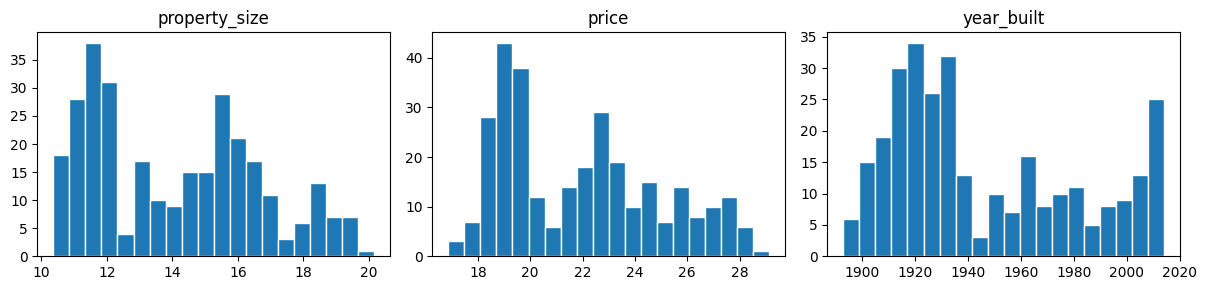

In [10]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 3))  

### YOUR CODE STARTS HERE ###

for label_idx, label in enumerate(feature_labels):
    # Set title for the subplot
    axes[label_idx].set_title(label)
    # Construct histogram for the subplot that corresponds to the label.
    axes[label_idx].hist(nych_X[:, label_idx], bins=20, edgecolor='white')

###  YOUR CODE ENDS HERE  ###

fig.tight_layout()

### Problem 2.5 (10 points): Feature Scatter Plots

To help further visualize the NYC-Housing datset, you will now create several scatter plots of the features. Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `pandas` or `seaborn`.

- For every pair of features in `nych_X`, plot a scatter plot of the feature values, colored according to their labels. For example, plot all data points with $y=0$ as blue, $y=1$ as green, etc. Your plot should be a grid of subplots with 3 rows and 3 columns, with the plot in position $(i,j)$ showing feature $x_i$ versus $x_j$, with the class labels indicated by color. (Hint: `axes[0, 0].scatter(...)` will create a scatter plot in the first column and first row).
- Include an x-label and a y-label on each subplot to indicate which features we are plotting.  For example, you can call the first feature "Feature 0", the second feature "Feature 1", etc. (Hint: `axes[0, 0].set_xlabel(...)` might help you with the first subplot.) 

Some starter code is provided for you below.

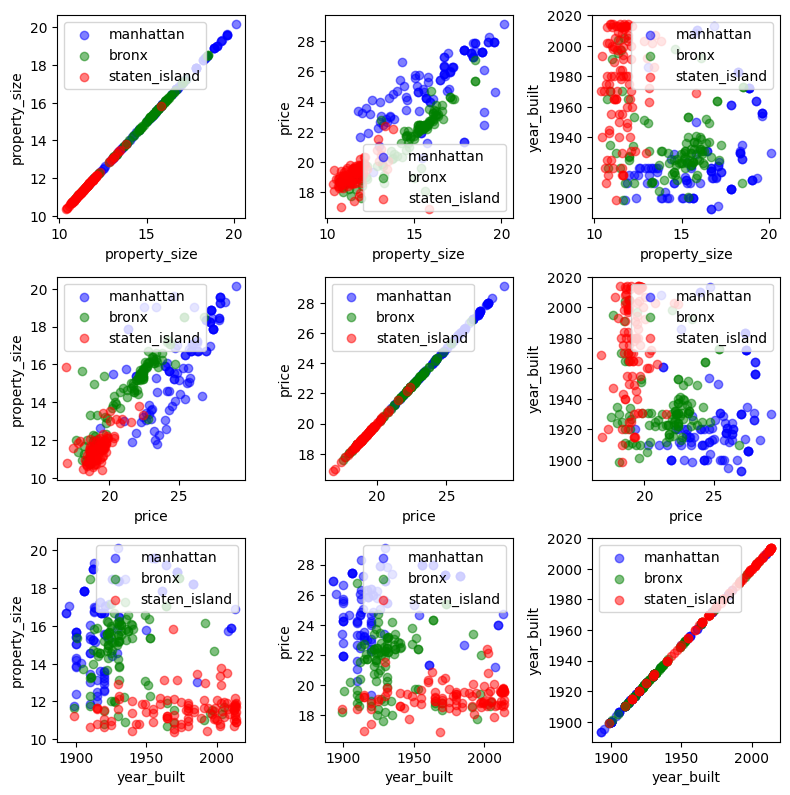

In [29]:
# Create a figure with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(8, 8))  

### YOUR CODE STARTS HERE ###
# Blue = Manhattan; Green = Bronx; Red = Staten Island
district_color_map = ['blue', 'green', 'red']
districts_data = [nych_X[np.where(nych_y == idx)] for idx in range(len(district_names))]

for x, x_label in enumerate(feature_labels):
    for y, y_label in enumerate(feature_labels):
        # Iterate through each district and scatter plot the district with the corresponding color map
        for dist_idx, dist_name in enumerate(district_names):
            dist_data = districts_data[dist_idx]
            axes[x, y].scatter(dist_data[:, x], dist_data[:, y], label=dist_name, c=district_color_map[dist_idx], alpha=0.5)
        
        # Set axis titles
        axes[x, y].set_xlabel(x_label)
        axes[x, y].set_ylabel(y_label)
        axes[x, y].legend()


###  YOUR CODE ENDS HERE  ###

fig.tight_layout()

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

---
## Problem 3: K-Nearest Neighbor Classifiers

In the next problem, you will explore the kNN classification algorithm using the same NYC-Housing dataset. You will use the `sklearn` implementation of kNN.

As we've discussed in lecture, it is often important to separate some data for evaluation (often callsed "validation" or "test" data, depending on the setting).  Let's do that first:
in the following cell, we split the NYC housing dataset into training and testing sets -- 75% of the data is used for training, and 25% is used for testing. The function `train_test_split` is provided by scikit-learn, and will automatically shuffle our data for us if we use the flag `shuffle=True`. 

**NOTE:** For this homework, do not alter the flag `random_state=seed`, as this is necessary for obtaining reproducible results.

In [12]:
# Note: if you want your train/test split to be reproduc
nych_X_tr, nych_X_te, nych_y_tr, nych_y_te = train_test_split(nych_X, nych_y, 
                                                   test_size=0.25, random_state=seed, shuffle=True)

First, let's train and visualize a 1-nearest neighbor classifier on our data.  In order to allow us to visualize vis plots, we will **only** use the first two features of our data:

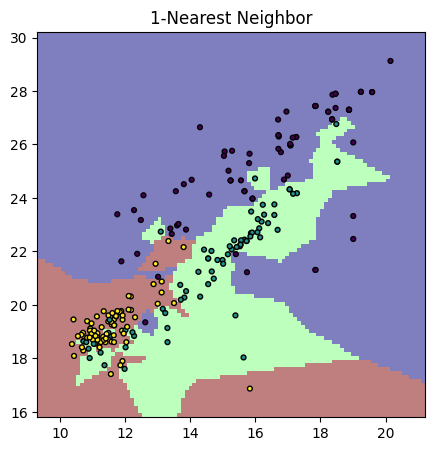

In [13]:
# Plot the decision boundaries for the kNN classifiers for various values of k

# Some keyword arguments for making nice looking plots.
plot_kwargs = {'cmap': 'jet',     # also: viridis
               'response_method': 'predict',
               'plot_method': 'pcolormesh',
               'shading': 'auto',
               'alpha': 0.5,
               'grid_resolution': 100}

# Create a figure
figure, axes = plt.subplots(1, 1, figsize=(5,5))

nych_X_tr2 = nych_X_tr[:,:2]     # Get just the first two features of our training set
nych_X_te2 = nych_X_te[:,:2]     #  & test set

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(nych_X_tr[:,:2],nych_y_tr) 
    
# Plot the resulting decision boundary for knn 
DecisionBoundaryDisplay.from_estimator(knn, nych_X_tr2, ax=axes, **plot_kwargs)
    
# Scatter plot of the training data
axes.scatter(nych_X_tr2[:, 0], nych_X_tr2[:, 1], c=nych_y_tr, edgecolor='k', s=12)
axes.set_title(f'1-Nearest Neighbor');

### Error rates

The (empirical) error rate of a classifier counts the number of mistakes in its predictions on a given data set.  This is sometimes called the zero-one loss, since it counts correct predictions as loss zero, and any incorrect predictions as loss one.  In `sklearn`, there is a function to compute this for you:

In [14]:
print(f'Training loss (sklearn): {zero_one_loss(nych_y_tr, knn.predict(nych_X_tr2))}')
print(f'Test loss (sklearn): {zero_one_loss(nych_y_te, knn.predict(nych_X_te2))}')

Training loss (sklearn): 0.0
Test loss (sklearn): 0.24


### Problem 3.1 (5 points): Computing Error Rates

Re-compute the error rate on your training and test data manually, using only `numpy` operations.  (You should get the same answer as the `sklearn` implementation.)

In [15]:
# Computing Training Loss
tr_loss = np.mean(nych_y_tr != knn.predict(nych_X_tr2))

# Computing Test Loss
te_loss = np.mean(nych_y_te != knn.predict(nych_X_te2))

print('Training loss (numpy): ', tr_loss)
print('Test loss (numpy): ', te_loss)

Training loss (numpy):  0.0
Test loss (numpy):  0.24


### Problem 3.2 (5 points): Confusion Matrices

A confusion matrix is a $c \times c$ matrix that characterizes the types of errors made by our classifier.  Entry $(i,j)$ indicates the number of times we saw a data with $y=i$, and predicted $\hat y=j$ -- so, the diagonal entries indicate correct predictions, while off-diagonal entries indicate different types of incorrect predictions.

Write a function `compute_confusion_matrix` to compute the confusion matrix from a vector of true target values and a vector of predictions:

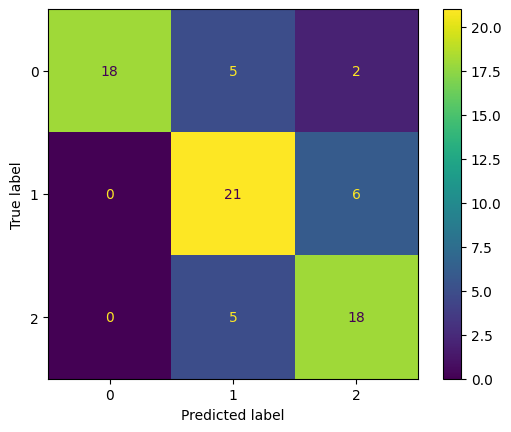

In [16]:
def compute_confusion_matrix(y, y_pred):
    """ Computes the confusion matrix of an array of predictions.
    
    y: true labels; shape (m, ), where m is the number of datapoints.
    y_pred: predicted labels; shape (m, ), where m is the number of datapoints.
    
    Returns:
    confusion_matrix: a numpy array corresponding to the confusion matrix from y and y_pred; shape (C, C), 
        where C is the number of unique classes.  The (i,j)th entry is the number of examples of class i
        that are classified as being from class j.
    """
    
    ### YOUR CODE STARTS HERE ###
    knn_labels = np.unique(y)
    confusion_matrix = np.zeros((len(knn_labels), len(knn_labels)))

    for tr_idx, tr_label in enumerate(knn_labels):
        for pr_idx, pr_label in enumerate(knn_labels):
            confusion_matrix[tr_idx, pr_idx] = np.sum((y == tr_label) & (y_pred == pr_label))

    ###  YOUR CODE ENDS HERE  ###
    
    return confusion_matrix

y_pred = knn.predict(nych_X_te2)
confusion_matrix_disp = ConfusionMatrixDisplay(confusion_matrix = compute_confusion_matrix(nych_y_te, y_pred))
confusion_matrix_disp.plot();

To check your results, compare your function's output to the `sklearn` built-in function:

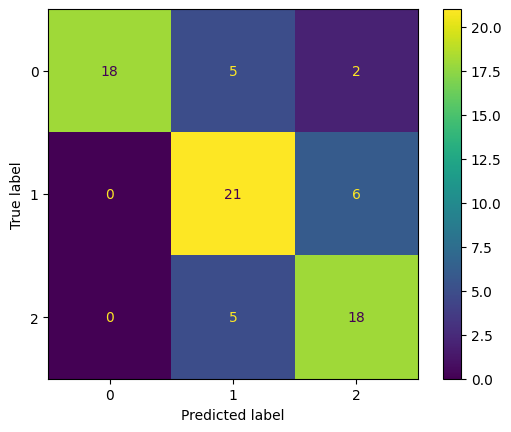

In [17]:
# Evaluate confusion matrix using the sklearn function confusion_matrix
y_pred = knn.predict(nych_X_te2)
sklearn_cm = confusion_matrix(nych_y_te, y_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

### Problem 3.3 (10 points): KNN Decision Boundaries

Now, re-train and plot the decision boundaries that are learned using larger values of $k$: $k=5$, $k=10$, and $k=50$.  You can follow the basic pattern in the previous example:

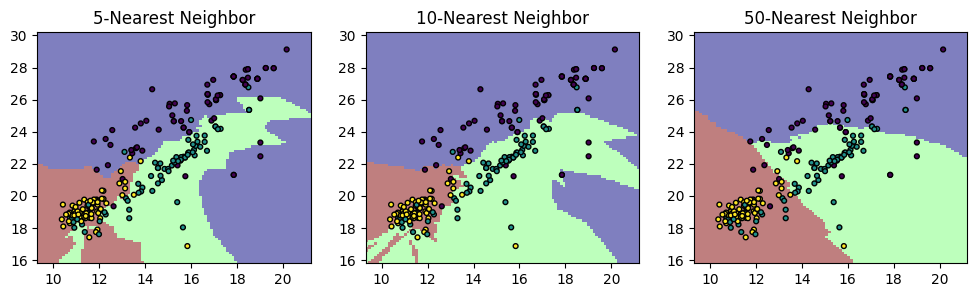

In [18]:
# Plot the decision boundaries for the kNN classifiers for various values of k

# Create a figure
figure, axes = plt.subplots(1, 3, figsize=(12,3))

### YOUR CODE STARTS HERE ###

for i,k in enumerate([5,10,50]): 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(nych_X_tr[:,:2],nych_y_tr)
    
    # Plot the resulting decision boundary for knn 
    DecisionBoundaryDisplay.from_estimator(knn, nych_X_tr2, ax=axes[i], **plot_kwargs)
    
    # Scatter plot of the training data
    axes[i].scatter(nych_X_tr2[:, 0], nych_X_tr2[:, 1], c=nych_y_tr, edgecolor='k', s=12)
    axes[i].set_title(f'{k}-Nearest Neighbor');
    
###  YOUR CODE ENDS HERE  ###

### Problem 3.4 (10 points): Error Rates vs K

Compute the training and test error rates (manually or using `sklearn`, whichever you prefer) for $k=1,2,3\ldots,100$.  Plot the training and test error rates as a function of $k$.

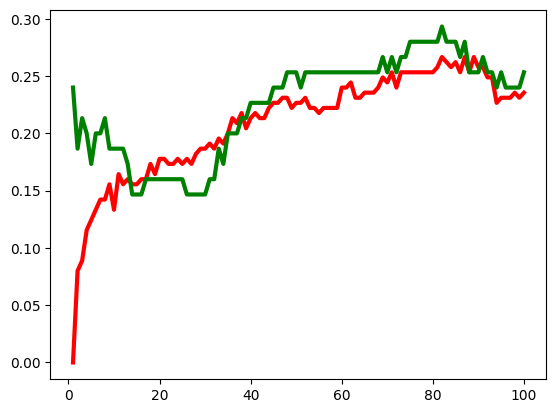

In [19]:
k_values = np.arange(1,101) #list(range(1,101))
err_tr = np.zeros(len(k_values))
err_te = np.zeros(len(k_values))

### YOUR CODE STARTS HERE ###

for i,k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(nych_X_tr[:,:2],nych_y_tr)
    err_tr[i] = zero_one_loss(nych_y_tr, knn.predict(nych_X_tr2))
    err_te[i] = zero_one_loss(nych_y_te, knn.predict(nych_X_te2))
    
    
###  YOUR CODE ENDS HERE  ###

plt.plot(k_values, err_tr, 'r-', k_values, err_te, 'g-', lw=3);

### Problem 3.5 (5 points): Model Selection

Using your training and test performance, what value of $k$ would you probably select?  Why did you pick that one?  (**Note:** there may be more than one possible correct answer to this question.)

* The test data shows the lowest error at k values of `(14, 15, 16, 26, 27, 28, 29, 39)` with an error value of `0.14667`. 
* The corresponding error values for the train data are `(0.15556, 0.15556, 0.16, 0.1778, 0.1733, 0.1822, 0.18667, 0.18667)`.
* Observing, the train error is notably lower for k values `(14, 15, 16)` in comparison to k values `(26, 27, 28, 29, 30)`. 

Therefore, it is optimal to select one of the k values from the range `(14, 15, 16)` which exhibit low errors for both the test and train data.

## Problem 4: MNIST Data

In this problem, we will apply our learners to a higher-dimensional data set, called the MNIST dataset. The MNIST dataset is an image dataset consisting of 70,000 hand-written digits (from 0 to 9), each of which is a 28x28 grayscale image. For each image, we also have a label, corresponding to which digit is written. Run the following code cell to load the MNIST dataset:

In [20]:
# Load the features and labels for the MNIST dataset
# This might take a minute to download the images.
mnist_X, mnist_y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

# Convert labels to integer data type
mnist_y = mnist_y.astype(int)

/Users/maganthseetharaman/Desktop/COMPSCI 273A/assignments/env/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


We also split the MNIST data into training and test subsets for our experiments:

In [21]:
mnist_X_tr, mnist_X_te, mnist_y_tr, mnist_y_te = train_test_split(mnist_X, mnist_y, 
                                                                  test_size=0.25, random_state=seed, shuffle=True)

Each data point in the MNIST dataset is 768-dimensional, with each feature corresponding to a pixel intensity of a $28\times 28$ scan of a digit.  To visualize a data point, we can re-shape the feature vector into the shape of the image, and then display it using `imshow`:

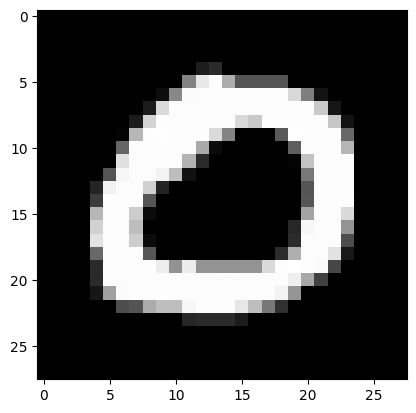

In [22]:
plt.imshow( mnist_X_te[0,:].reshape(28,28) ,cmap='gray');

### Problem 4.1 (5 points): MINST Confusion Matrix

First, train a 1-nearest neighbor classifier on the MNIST dataset.
Then, compute the confusion matrix of your classifier on the test data.  You may use your function, or the `sklearn` built-in function, whichever you prefer.  **Note:** this process may be a bit slow!

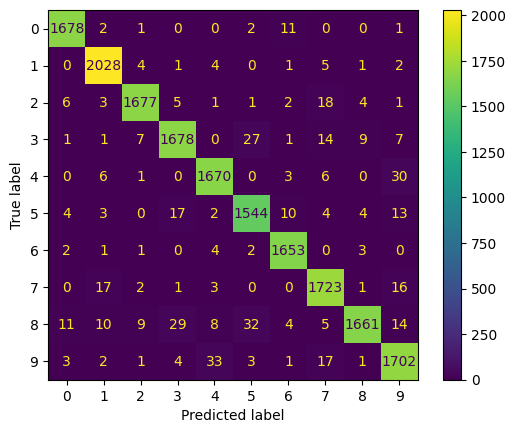

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(mnist_X_tr,mnist_y_tr)
y_pred = knn.predict(mnist_X_te)
sklearn_cm = confusion_matrix(mnist_y_te, y_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

What are some of the most common mistakes?  What are some uncommon mistakes?  Thinking about the data and problem, do these make sense?

In [24]:
sklearn_cm_incorrect_df = pd.DataFrame(columns=['Number', 'Incorrect Prediciton', 'Common Misprediction - Element - Freq - Ratio', 'Uncommon Misprediction - Element - Freq - Ratio'])

n_sklearn_cm = len(sklearn_cm)
for i in range(n_sklearn_cm):
    sklearn_cm_row = sklearn_cm[i][:i].tolist() + sklearn_cm[i][i+1:].tolist()

    sklearn_cm_incorrect_df.loc[i] = [
        i,
        sum(sklearn_cm_row),
        f'{np.argmax(sklearn_cm_row)} - {max(sklearn_cm_row)} - {max(sklearn_cm_row)/sum(sklearn_cm_row):.2%}',
        f'{np.argmin(sklearn_cm_row)} - {min(sklearn_cm_row)} - {min(sklearn_cm_row)/sum(sklearn_cm_row):.2%}'

    ]

sklearn_cm_incorrect_df

Number  Incorrect Prediciton Common Misprediction - Element - Freq - Ratio  \
0       0                    17                               5 - 11 - 64.71%   
1       1                    18                                6 - 5 - 27.78%   
2       2                    41                               6 - 18 - 43.90%   
3       3                    67                               4 - 27 - 40.30%   
4       4                    46                               8 - 30 - 65.22%   
5       5                    57                               3 - 17 - 29.82%   
6       6                    13                                4 - 4 - 30.77%   
7       7                    40                               1 - 17 - 42.50%   
8       8                   122                               5 - 32 - 26.23%   
9       9                    65                               4 - 33 - 50.77%   

  Uncommon Misprediction - Element - Freq - Ratio  
0                                   2 - 0 - 0.00%  
1                                   0 - 0 - 0.00%  
2                                   3 - 1 - 2.44%  
3                                   3 - 0 - 0.00%  
4                                   0 - 0 - 0.00%  
5                                   2 - 0 - 0.00%  
6                                   3 - 0 - 0.00%  
7                                   0 - 0 - 0.00%  
8                                   6 - 4 - 3.28%  
9                                   2 - 1 - 1.54%

- Frequent Mispredictions:
    - The digit `8` stands out as the most commonly mispredicted number, being erroneously identified as `5` on a total of `32` occasions out of `122` mispredictions. This results in an approximate 27% mispredictions.
    - Following closely, the digit `9` is the second most frequently mispredicted number. It is often misidentified as `4`, occurring `33` times out of the `65` mispredictions, which corresponds to a notable 51% mispredictions.

- Rare Mispredictions:
    - Notably, the digit `1` does not exhibit any instances of being mispredicted as `0`, and likewise, it is not mispredicted as `2`.
    - Conversely, there is at least one recorded occurrence where the digit `9` was inaccurately predicted as `2`. Additionally, the digit `2` is sometimes mispredicted as `3`.

You may have noticed that the prediction process is quite slow.  This is one issue with nearest neighbor predictors -- although training is quick (just storage), each prediction can be very slow, depending on the training data size.

### Problem 4.2 (10 points): Examining Nearest Neighbors

You can use the function `kneighbors(x, n_neighbors=...)` to find the actual index of the nearest neighbors in the training set, so you can examine them.

For three data points, `i in [0,17,99]`, display the test data point (as an image), along with the three nearest neighbors of that test point in the training set.  You should see that the nearest neighbors are pretty similar (though not exactly the same), showing why the model works reasonably well on this problem.

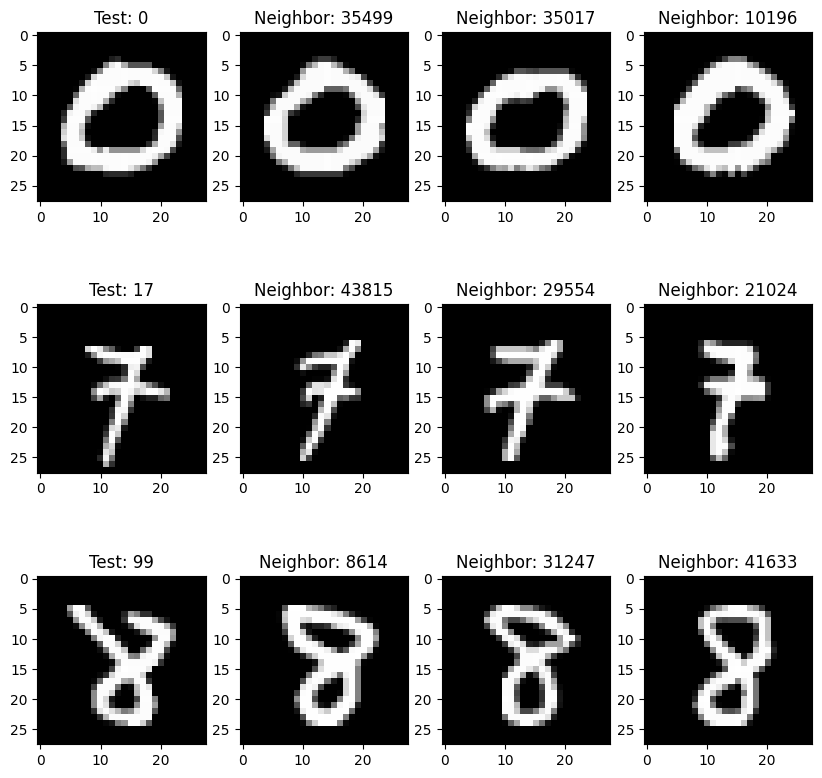

In [30]:
idx = [0,17,99]

# Number of tests to check
n_test = len(idx)
# Number of neighbors
n_nbrs = 3

# Create a figure
figure, axes = plt.subplots(n_test, n_nbrs + 1, figsize=(10,10))

### YOUR CODE STARTS HERE ###
dists, nbrs = knn.kneighbors(mnist_X_te[idx], n_neighbors=n_nbrs)

for i in range(len(idx)):
    axes[i,0].imshow(mnist_X_te[idx[i]].reshape(28,28), cmap='gray')
    axes[i,0].set_title(f'Test: {idx[i]}')
    for j in range(n_nbrs):
        axes[i,j+1].imshow(np.reshape(mnist_X_tr[nbrs[i][j]], (28,28)), cmap='gray')
        axes[i,j+1].set_title(f'Neighbor: {nbrs[i][j]}')
    
##  YOUR CODE ENDS HERE  ###


<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

I did not discuss the specific solutions with anyone.

Maganth Seetharaman 

10/13/23

### References

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://stackoverflow.com/questions/52864770/numpy-add-append-value-to-each-row-of-2-d-array
- https://stackoverflow.com/questions/62934932/concatenate-two-numpy-arrays-row-wise
- https://stackoverflow.com/questions/30108372/how-to-make-matplotlib-scatterplots-transparent-as-a-group
- https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
- https://www.geeksforgeeks.org/matplotlib-axes-axes-set_label-in-python/
- https://stackoverflow.com/questions/47006268/scatter-plot-with-color-label-and-legend-specified-by-c-option
- https://numpy.org/doc/stable/reference/generated/numpy.where.html
- https://numpy.org/doc/stable/reference/generated/numpy.mean.html
- https://stackoverflow.com/questions/15819980/calculate-mean-across-dimension-in-a-2d-array
- https://panjeh.medium.com/how-to-get-average-of-rows-columns-in-a-numpy-array-8f305dd92624
- https://stackoverflow.com/questions/8251541/numpy-for-every-element-in-one-array-find-the-index-in-another-array
- https://stackoverflow.com/questions/39646070/pandas-histogram-plot-histogram-for-each-column-as-subplot-of-a-big-figure
- https://stackoverflow.com/questions/19311498/matplotlib-plot-with-a-different-color-for-certain-data-points
- https://stackoverflow.com/questions/65107612/scatterplot-change-color-of-specific-point
- https://towardsdatascience.com/create-your-own-k-nearest-neighbors-algorithm-in-python-eb7093fc6339